In [1]:
# Import some package 
import torch
import torchvision
import torch.nn as tn
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.utils as utils

In [2]:
train_data = torchvision.datasets.MNIST('./data',download=True)
test_data = torchvision.datasets.MNIST('data',train=False)
print(train_data)
print(test_data)

100%|██████████| 9912422/9912422 [00:02<00:00, 4778471.91it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1123884.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1248500.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 43494357.92it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test


Text(0.5, 1.0, 'Label of Image:0')

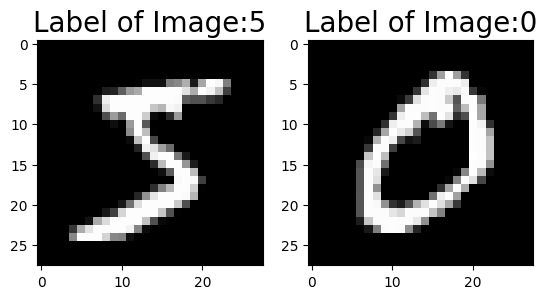

In [3]:
import matplotlib.pyplot as plt
  
plt.subplot(1,2,1)
image, label = train_data[0]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)
plt.subplot(1,2,2)
image, label = train_data[1]
plt.imshow(image, cmap='gray')
plt.title("Label of Image:{}".format(label),fontsize=20)

In [4]:
train_data = torchvision.datasets.MNIST('data',train=True,transform=tt.ToTensor())
test_data = torchvision.datasets.MNIST('data',train=False,transform=tt.ToTensor()) 

In [5]:
# Arguments Required
input_size = 28*28  #Size of image

num_classes = 10  #the image number are in range 0-10

num_epochs = 5 #one cycle through the full train data

batch_size = 100 #sample size consider before updating the model’s weights

learning_rate = 0.001  #step size to update parameter

In [6]:
train_dataLoader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,shuffle=True)
test_dataLoader = torch.utils.data.DataLoader(test_data,batch_size=batch_size,shuffle=False)

In [7]:
class LogisticRegression(tn.Module):
    def __init__(self,input_size,num_classes):
        super(LogisticRegression,self).__init__()
        self.linear = tn.Linear(input_size,num_classes)
    
    def forward(self,feature):
        output = self.linear(feature)
        return output

In [8]:
model = LogisticRegression(input_size,num_classes)
loss = tn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [9]:
run = 0
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_dataLoader):
        images = torch.autograd.Variable(images.view(-1,input_size))
        labels = torch.autograd.Variable(labels)
        
        # Nullify gradients w.r.t. parameters
        optimizer.zero_grad()
        #forward propagation
        output = model(images)
        # compute loss based on obtained value and actual label
        compute_loss = loss(output,labels)
        # backward propagation
        compute_loss.backward()
        # update the parameters
        optimizer.step()
        run+=1
        
        if (i+1)%200 == 0:
            # check total accuracy of predicted value and actual label
            accurate = 0
            total = 0
            for images,labels in test_dataLoader:
                images = torch.autograd.Variable(images.view(-1,input_size))
                output = model(images)
                _,predicted = torch.max(output.data, 1)
                # total labels
                total+= labels.size(0)
                
                # Total correct predictions
                accurate+= (predicted == labels).sum()
                accuracy_score = 100 * accurate/total
            
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(run, compute_loss.item(), accuracy_score))

print('Final Accuracy:',accuracy_score)


Iteration: 200. Loss: 2.087371587753296. Accuracy: 36.939998626708984
Iteration: 400. Loss: 1.9244259595870972. Accuracy: 62.16999816894531
Iteration: 600. Loss: 1.7469160556793213. Accuracy: 70.04000091552734
Iteration: 800. Loss: 1.6654170751571655. Accuracy: 73.76000213623047
Iteration: 1000. Loss: 1.612280011177063. Accuracy: 75.83999633789062
Iteration: 1200. Loss: 1.4456595182418823. Accuracy: 77.16999816894531
Iteration: 1400. Loss: 1.3338619470596313. Accuracy: 78.62000274658203
Iteration: 1600. Loss: 1.2289304733276367. Accuracy: 79.62000274658203
Iteration: 1800. Loss: 1.3216710090637207. Accuracy: 80.33999633789062
Iteration: 2000. Loss: 1.1157909631729126. Accuracy: 81.19000244140625
Iteration: 2200. Loss: 1.1493514776229858. Accuracy: 81.61000061035156
Iteration: 2400. Loss: 1.0938267707824707. Accuracy: 82.19999694824219
Iteration: 2600. Loss: 0.9956242442131042. Accuracy: 82.45999908447266
Iteration: 2800. Loss: 1.1061732769012451. Accuracy: 82.80999755859375
Iteration: 